# Ridge Regression

In [106]:
# Importing the basic libraries used to simulate the model

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Importing the boston dataset from python library and other python libraries

from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [108]:
# Loading the datasets into pandas dataframe for further processing and model training and testing

dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

dataset['MEDV'] = boston_dataset.target

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### The Boston Dataset variables in order:

**CRIM :** per capita crime rate by town

**ZN :** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS :** proportion of non-retail business acres per town

**CHAS :** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX :** nitric oxides concentration (parts per 10 million)

**RM :** average number of rooms per dwelling

**AGE :** proportion of owner-occupied units built prior to 1940

**DIS :** weighted distances to five Boston employment centres

**RAD :** index of accessibility to radial highways

**TAX :** full-value property-tax rate per $\$$10,000

**PTRATIO :** pupil-teacher ratio by town

**B :** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT :** lower status of the population

**MEDV :** Median value of owner-occupied homes in $1000's

In [109]:
# The statistical data related to the dataset (such as mean, variance, min and max values)

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


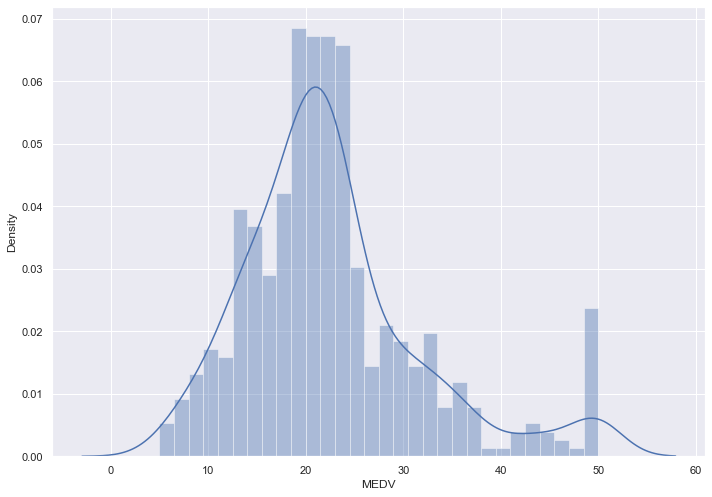

In [110]:
# The distribution of the target variable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset['MEDV'], bins=30)
plt.show()

In [111]:
# Splitting the dataset into separate features dataframe and target dataframe for training and testing of the Machine Learing Model

X = pd.DataFrame(np.c_[dataset['CRIM'], dataset['ZN'], dataset['INDUS'], dataset['CHAS'], dataset['NOX'], dataset['RM'], dataset['AGE'], dataset['DIS'], dataset['RAD'], dataset['TAX'], dataset['PTRATIO'], dataset['B'], dataset['LSTAT']], columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
Y = dataset['MEDV']

In [112]:
# Scale the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [113]:
# Splitting the features and target into training and testing datasets.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Hypothesis of a Ridge Regression

A ridge regression model is represented by:
$$
Y = w_0 + w_1x_1 + w_2x_2 + w_nx_n \quad \implies Y = w^Tx
$$
where, $Y$ is the predicted value, $w_0$ is the bias term, $w_1, ..., w_n$ are the weights, $x_1, x_2, ..., x_n$ are the feature values

The cost function is denoted by:
$$
J(w) = \frac{1}{2m}(\sum_{i=1}^{m}(h(x_i)-y_i)^2 + \lambda * \sum_{i=1}^{m}{w_i^2})
$$
where, $h(x) = w_0 + w_1x_1 + ... + w_nx_n$, and $m = $ number of training samples and $\lambda$ is the regularization parameter

Gradient Descent:
$$
\frac{\partial J(w)}{\partial w_0} = \frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)\\
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m}(\sum_{i=1}^{m}(h(x_i)-y_i)x_{i,j} + \lambda * \sum_{i=1}^{m}{w_i})
$$
where, $h(x) = w_0 + w_1x_1 + ... + w_nx_n$, and $m = $ number of training samples and $\lambda$ is the regularization parameter

Updating the parameters as
$$
w_0 = w_0 - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x_i)-y_i)\\
w_j = w_j - \frac{\alpha}{m}(\sum_{i=1}^{m}(h(x_i)-y_i)x_{i,j} + \lambda * \sum_{i=1}^{m}{w_i})
$$
where, $\alpha$ is the learning parameter and other parameters remain the same

In [114]:
# Calculating the cost

def CostFunction(x, y, weight, bias, l2):
    cost = np.sum((((x.dot(weight) + bias) - y) ** 2) + (l2 * weight.T.dot(weight))) / (2*len(y))
    return cost

In [126]:
# Gradient Descent

def GradientDescent(x, y, weight, bias, learning_rate, l2, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        h = x.dot(weight) + bias
        loss = h - y
        
        bias_gradient = np.sum(loss) / len(y)
        weight_gradient = (((x.T).dot(loss)) + (l2 * weight)) / len(y)
        
        bias = bias - learning_rate * bias_gradient
        weight = weight - learning_rate * weight_gradient
        
        cost = CostFunction(x, y, weight, bias, l2)
        cost_list[epoch] = cost
        
        print("Cost at epoch",epoch,"is:",cost)
        
    return weight, bias, cost_list

In [130]:
# Calculating weights, bias and cost with weights and bias being zeros and the learning rate (alpha) = 0.01 and l2 penalty (lambda) is 1.

weight, bias, cost = GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.01, l2 = 1, epochs=1500)

Cost at epoch 0 is: 291.67199674190186
Cost at epoch 1 is: 284.36658638826145
Cost at epoch 2 is: 277.4339503231436
Cost at epoch 3 is: 270.83949918353403
Cost at epoch 4 is: 264.5525699185813
Cost at epoch 5 is: 258.5459642234876
Cost at epoch 6 is: 252.7955413855795
Cost at epoch 7 is: 247.27985913663034
Cost at epoch 8 is: 241.9798568587732
Cost at epoch 9 is: 236.87857615610582
Cost at epoch 10 is: 231.96091439072794
Cost at epoch 11 is: 227.21340729965112
Cost at epoch 12 is: 222.62403726588147
Cost at epoch 13 is: 218.18206422013398
Cost at epoch 14 is: 213.87787650541296
Cost at epoch 15 is: 209.70285935064496
Cost at epoch 16 is: 205.64927887659687
Cost at epoch 17 is: 201.7101798017841
Cost at epoch 18 is: 197.8792952318053
Cost at epoch 19 is: 194.1509671058997
Cost at epoch 20 is: 190.52007604250122
Cost at epoch 21 is: 186.98197947378222
Cost at epoch 22 is: 183.5324570899652
Cost at epoch 23 is: 180.16766272958358
Cost at epoch 24 is: 176.8840819536935
Cost at epoch 25 is:

Cost at epoch 243 is: 29.13108616104129
Cost at epoch 244 is: 29.115861773687783
Cost at epoch 245 is: 29.10126016867737
Cost at epoch 246 is: 29.087267325659894
Cost at epoch 247 is: 29.07386952001183
Cost at epoch 248 is: 29.06105331673719
Cost at epoch 249 is: 29.048805564493172
Cost at epoch 250 is: 29.037113389737932
Cost at epoch 251 is: 29.025964190997996
Cost at epoch 252 is: 29.015345633252945
Cost at epoch 253 is: 29.005245642434858
Cost at epoch 254 is: 28.995652400040342
Cost at epoch 255 is: 28.986554337852624
Cost at epoch 256 is: 28.977940132771746
Cost at epoch 257 is: 28.969798701750367
Cost at epoch 258 is: 28.962119196833218
Cost at epoch 259 is: 28.954891000298044
Cost at epoch 260 is: 28.948103719895915
Cost at epoch 261 is: 28.94174718418892
Cost at epoch 262 is: 28.93581143798332
Cost at epoch 263 is: 28.930286737856022
Cost at epoch 264 is: 28.92516354777274
Cost at epoch 265 is: 28.920432534795708
Cost at epoch 266 is: 28.916084564879302
Cost at epoch 267 is: 2

Cost at epoch 594 is: 31.39993277397419
Cost at epoch 595 is: 31.40723860454007
Cost at epoch 596 is: 31.41453481480273
Cost at epoch 597 is: 31.421821437298092
Cost at epoch 598 is: 31.42909850441789
Cost at epoch 599 is: 31.43636604840855
Cost at epoch 600 is: 31.443624101370062
Cost at epoch 601 is: 31.450872695255043
Cost at epoch 602 is: 31.458111861867685
Cost at epoch 603 is: 31.46534163286292
Cost at epoch 604 is: 31.472562039745537
Cost at epoch 605 is: 31.479773113869435
Cost at epoch 606 is: 31.486974886436826
Cost at epoch 607 is: 31.494167388497573
Cost at epoch 608 is: 31.501350650948588
Cost at epoch 609 is: 31.508524704533173
Cost at epoch 610 is: 31.515689579840533
Cost at epoch 611 is: 31.522845307305257
Cost at epoch 612 is: 31.529991917206893
Cost at epoch 613 is: 31.537129439669492
Cost at epoch 614 is: 31.544257904661297
Cost at epoch 615 is: 31.551377341994385
Cost at epoch 616 is: 31.558487781324388
Cost at epoch 617 is: 31.565589252150264
Cost at epoch 618 is: 

Cost at epoch 977 is: 33.68487771500962
Cost at epoch 978 is: 33.689799891856794
Cost at epoch 979 is: 33.69471761452995
Cost at epoch 980 is: 33.69963088827032
Cost at epoch 981 is: 33.70453971830772
Cost at epoch 982 is: 33.70944410986068
Cost at epoch 983 is: 33.71434406813644
Cost at epoch 984 is: 33.719239598331136
Cost at epoch 985 is: 33.72413070562981
Cost at epoch 986 is: 33.72901739520649
Cost at epoch 987 is: 33.733899672224275
Cost at epoch 988 is: 33.73877754183546
Cost at epoch 989 is: 33.74365100918153
Cost at epoch 990 is: 33.7485200793933
Cost at epoch 991 is: 33.753384757590965
Cost at epoch 992 is: 33.758245048884156
Cost at epoch 993 is: 33.76310095837207
Cost at epoch 994 is: 33.76795249114348
Cost at epoch 995 is: 33.77279965227683
Cost at epoch 996 is: 33.777642446840325
Cost at epoch 997 is: 33.78248087989198
Cost at epoch 998 is: 33.78731495647968
Cost at epoch 999 is: 33.79214468164129
Cost at epoch 1000 is: 33.79697006040468
Cost at epoch 1001 is: 33.80179109

Cost at epoch 1296 is: 35.05379025134071
Cost at epoch 1297 is: 35.05751670945631
Cost at epoch 1298 is: 35.06124003688421
Cost at epoch 1299 is: 35.06496023702362
Cost at epoch 1300 is: 35.068677313270015
Cost at epoch 1301 is: 35.07239126901512
Cost at epoch 1302 is: 35.07610210764692
Cost at epoch 1303 is: 35.07980983254966
Cost at epoch 1304 is: 35.083514447103866
Cost at epoch 1305 is: 35.08721595468635
Cost at epoch 1306 is: 35.09091435867016
Cost at epoch 1307 is: 35.094609662424666
Cost at epoch 1308 is: 35.09830186931547
Cost at epoch 1309 is: 35.101990982704514
Cost at epoch 1310 is: 35.10567700594998
Cost at epoch 1311 is: 35.10935994240638
Cost at epoch 1312 is: 35.113039795424484
Cost at epoch 1313 is: 35.1167165683514
Cost at epoch 1314 is: 35.12039026453052
Cost at epoch 1315 is: 35.12406088730152
Cost at epoch 1316 is: 35.127728440000396
Cost at epoch 1317 is: 35.13139292595948
Cost at epoch 1318 is: 35.13505434850737
Cost at epoch 1319 is: 35.138712710969024
Cost at ep

Text(0.5, 1.0, 'Training Cost')

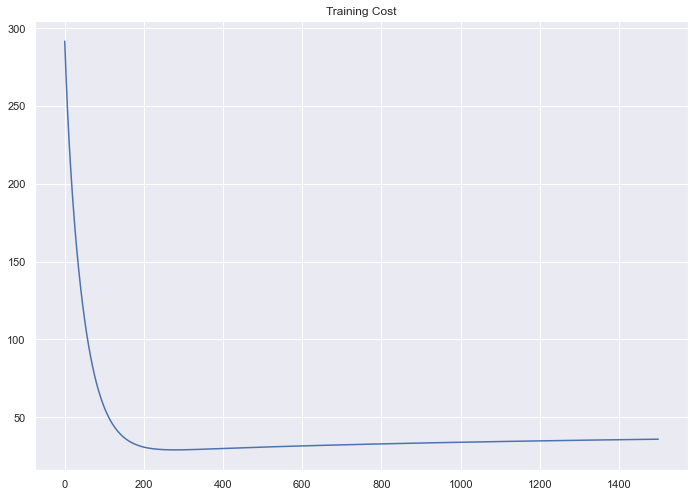

In [131]:
# Plotting the training loss at each epoch

epochs = [i for i in range(1500)]

plt.plot(epochs, cost)
plt.title("Training Cost")

In [118]:
# Predicting the values for the testing dataset

def predict(X, weight, bias):
    return X.dot(weight) + bias

In [119]:
y_pred = predict(X_test, weight, bias)

In [120]:
y_pred

array([37.36471956, 31.4439652 , 27.31174346,  5.40040802, 35.06866214,
        5.81039195, 27.66485205, 31.75197974, 26.93150954, 22.49561231,
       32.30683916, 21.25125996, 23.63363449, 32.74879563, 28.05953663,
       15.28573804, -0.16481345, 18.95868341, 14.08645676, 14.02936783,
        3.71710232, 20.09395894, 38.02862788, 24.25330003, 31.37012722,
       11.15733961, 25.00288247, 23.81656733, 22.39979316, 21.58328438,
       13.81025183,  8.60318829, 18.20959458, 22.49308073, 28.68989147,
       19.40007646, 30.14404009,  8.68062902, 40.88275856, 34.23250249,
       20.55530802,  2.89391052, 29.64563601, 12.09772778, 26.75970149,
       30.96585281, -6.13394016, 18.46602906, 21.35254208, 12.83878318,
       20.88866123, 19.25796848, 23.96038514, 12.91489716, 17.52170218,
       25.392191  , 35.27897804, 15.2426571 , 27.94357837, 20.80523766,
       20.76971526, 25.86048123, 15.00076877, 33.10131312, 23.42064657,
       13.00805845, 19.50857682, 24.53393677, 21.4513482 , 21.71

In [121]:
Y_test.values

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

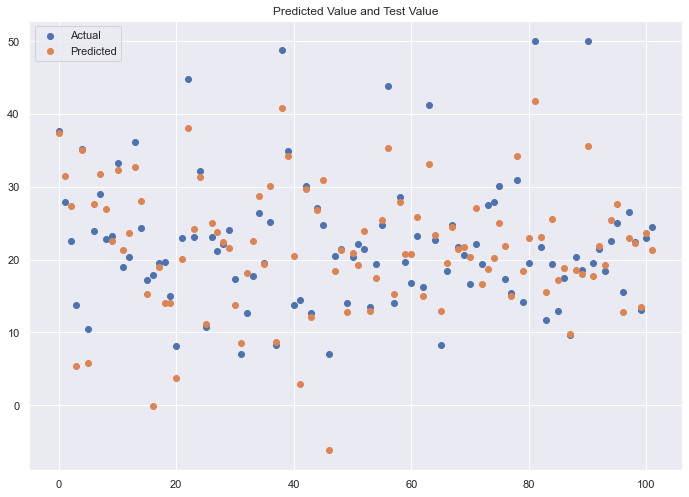

In [122]:
# Plotting the actual and predicted testing dataset values

y_range = [i for i in range(len(Y_test))]

plt.scatter(y_range, Y_test)
plt.scatter(y_range, y_pred)
plt.title("Predicted Value and Test Value")
plt.legend(labels = ('Actual','Predicted'), loc='upper left')

In [123]:
# Calculating the r² accuracy of our model
def r2score(y_pred, Y_test):
    rss = np.sum((y_pred - Y_test) ** 2)
    tss = np.sum((Y_test- Y_test.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

r2score(y_pred, Y_test)

0.7367652781895376

In [124]:
# Using scikit-learn libraries
rr = Ridge(alpha = 0.01)
rr.fit(X_train, Y_train)

pred_test_rr= rr.predict(X_test)
print(r2_score(Y_test, pred_test_rr))

0.7334611146919232
